# Import required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

# Read Input File

In [2]:
# Read the input data file and create a dataframe
data = pd.read_csv('concrete.csv', header=0)
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# Following are the columns in the input dataset.
# cement - quantitative - kg in a m3 mixture - Input Variable
# slag - Blast Furnace (Slag) - quantitative - kg in m3 mixture - Input Variable
# ash - Fly Ash (ash) - quantitative - kg in m3 mixture - Input Variable
# water - quantitative - kg in m3 mixture - Input Variable
# superplastic - quantitative - kg in m3 mixture - Input Variable
# coarseagg - Coarse Aggregate - quantitative - kg in m3 mixture - Input Variable
# fineagg - Fine Aggregate - quantitative - kg in m3 mixture - Input Variable
# age - quantitative - 1 to 365 days - Input Variable
# strength - Concrete compressive strength - quantitative - Mpa - Output / Target Variable

# let's perform univariate analysis on the input data

In [4]:
data.shape

(1030, 9)

In [5]:
# OBSERVATION : There are 9 columns and 1030 rows of data.

In [6]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
# OBSERVATION :  All columns in the input data are numeric

In [8]:
# Check if there are any null values in the input data

In [9]:
data.isnull().sum().sum()

0

In [10]:
# OBSERVATION :  There are no missing values in the input data

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


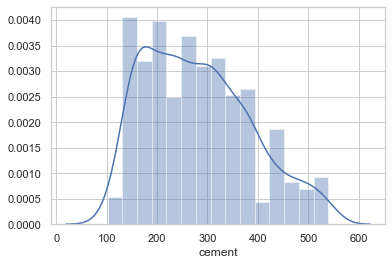

In [12]:
sns.distplot(data['cement'])
plt.show()

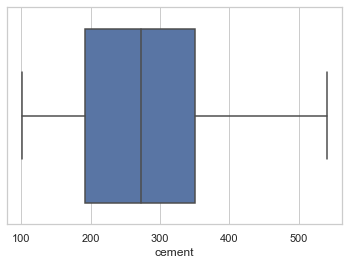

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["cement"])

In [14]:
# OBSERVATION :
# Cement composition lies between 102 to 540 Kg with a median of 272.9 Kg. 
# IQR = 157.625 ; Q1 = 192.375 ; Q3 = 350
# lower outliers = Q1 - (1.5 x IQR) = -44.0625
# higher outlier = Q3 + (1.5) x IQR) = 586.4375
# The cement distribution does not appear to have outliers.

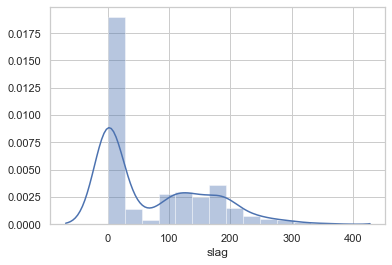

In [15]:
sns.distplot(data['slag'])
plt.show()

In [16]:
data['slag'].value_counts()

0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64

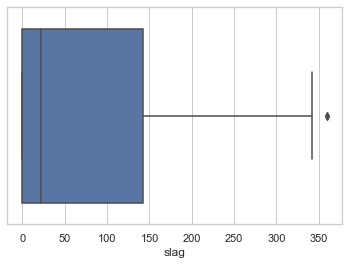

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["slag"])

In [18]:
# OBSERVATION
# Out of 1030 rows of input data, 471 lines are zero. This could be non availability of data or may be a zero value on Slag.
# Generally, slag will add to the strength of cement. In this case, zero appears to be missing values. 
# Given that this column has 50% zeros, this column may not be very useful for modelling the strength.
# Also, the median is 22 kg per m3. Therefore the rows that have non zero values appear to be outliers. 

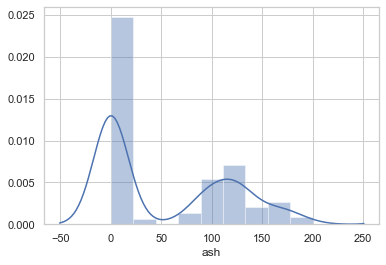

In [19]:
sns.distplot(data['ash'])
plt.show()

In [20]:
data['ash'].value_counts()

0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64

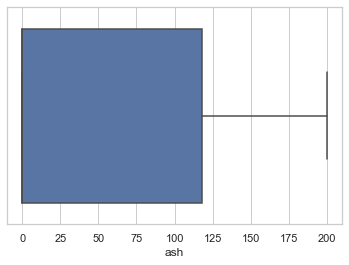

In [21]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["ash"])

In [22]:
# OBSERVATION
# Out of 1030 rows of input data, 566 lines are zero. This could be non availability of data or may be a zero value on ash.
# Given that this column has approx. 50% zeros, this column may not be very useful for modelling the strength.
# Also, the median is 0 kg per m3.  

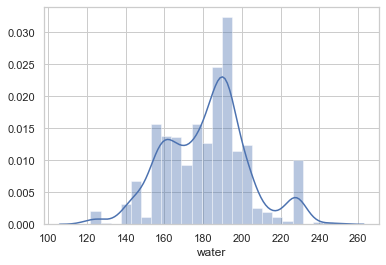

In [23]:
sns.distplot(data['water'])
plt.show()

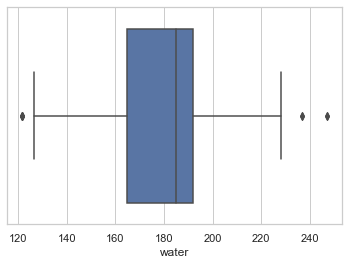

In [24]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["water"])

In [25]:
# OBSERVATION :
# Water lies between 121.80 to 247 Kg with a median of 185 Kg. 
# Q3 = 192, Q1 = 164.9 ; IQR = 27.1
# lower outliers = Q1 - (1.5 x IQR) =  124.25
# higher outlier = Q3 + (1.5) x IQR) =  232.63
# Values below 124.25 and above 232.63 are outliers. 

In [26]:
water_outliers_df = data[(data.water < 124.25)| (data.water > 232.63)]

In [27]:
water_outliers_df.shape

(9, 9)

In [28]:
water_outliers_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [29]:
# OBSERVATION
# There are only 9 rows of data with outlier 'water' values
# Since there are few outliers in this input data, we can replace the lower outliers with Q1 and the higher outliers with Q3.
# We will test the accuracy of the models with and without the outlier suppression.

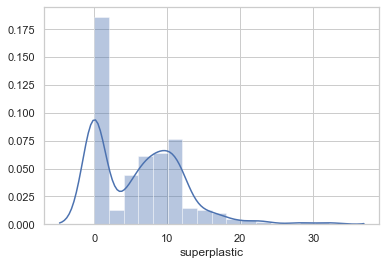

In [30]:
sns.distplot(data['superplastic'])
plt.show()

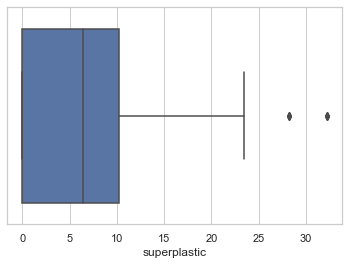

In [31]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["superplastic"])

In [32]:
data['superplastic'].value_counts()

0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
2.2       1
11.5      1
6.3       1
10.5      1
9.8       1
Name: superplastic, Length: 111, dtype: int64

In [33]:
# Almost 37% of the data has zero values.
# Superplastic values lies between 0 to 32.2 Kg with a median of 6.4 Kg. 
# Q3 = 10.2, Q1 = 0 ; IQR = 10.2 
# lower outliers = Q1 - (1.5 x IQR) =  -15.3
# higher outlier = Q3 + (1.5) x IQR) =  25.5
# Values below -15.3 and above 25.5 are outliers. 
# There are no values below zero. 

In [34]:
superplastic_outliers_df = data[(data.superplastic < -15.3)| (data.superplastic > 25.5)]

In [35]:
superplastic_outliers_df.shape

(10, 9)

In [36]:
# There are only 10 rows that are outliers

In [37]:
superplastic_outliers_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [38]:
# The outliers can be replaced with Q3 values. 

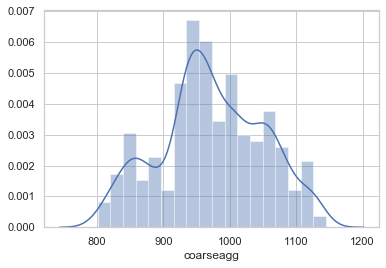

In [39]:
sns.distplot(data['coarseagg'])
plt.show()

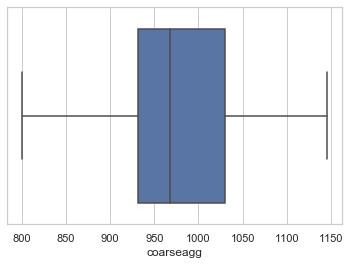

In [40]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["coarseagg"])

In [41]:
# Coarseagg values lies between 801 to 1145 Kg with a median of 968 Kg. 
# Q3 = 1029.4, Q1 = 932 ; IQR = 97.4
# lower outliers = Q1 - (1.5 x IQR) =  785.9
# higher outlier = Q3 + (1.5) x IQR) = 1175.5
# Values below 785.9 and above 1175.5 are outliers. 

In [42]:
coarseagg_outliers_df = data[(data.coarseagg < 785.9)| (data.coarseagg > 1175.5)]

In [43]:
coarseagg_outliers_df.shape

(0, 9)

In [44]:
# There are no outliers on the coarseagg input.

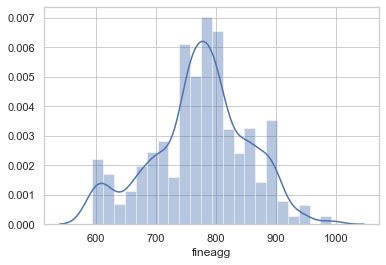

In [45]:
sns.distplot(data['fineagg'])
plt.show()

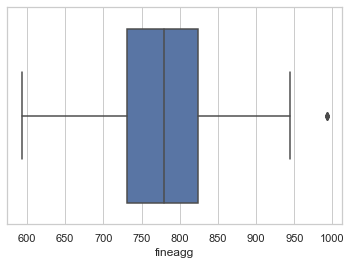

In [46]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["fineagg"])

In [47]:
# fineagg values lies between 594 to 992.6 Kg with a median of 779.5 Kg. 
# Q3 = 824, Q1 = 730.95 ; IQR = 93.05
# lower outliers = Q1 - (1.5 x IQR) =  591.375
# higher outlier = Q3 + (1.5) x IQR) = 963.575
# Values below 591.375 and above 963.575 are outliers. 

In [48]:
fineagg_outliers_df = data[(data.fineagg < 591.375)| (data.fineagg > 963.575)]

In [49]:
fineagg_outliers_df.shape

(5, 9)

In [50]:
fineagg_outliers_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


In [51]:
# There are only 5 rows with an outlier. These can be replaced with Q3 values.
# We will test the accuracy of the models with and without the outlier suppression.

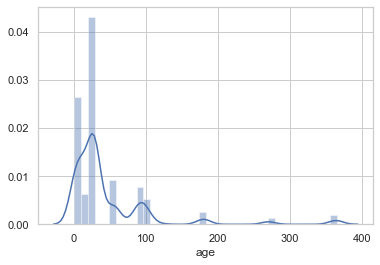

In [52]:
sns.distplot(data['age'])
plt.show()

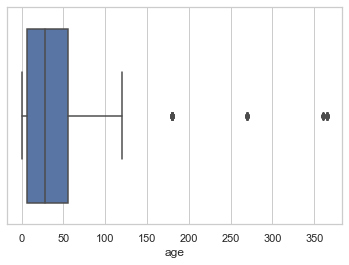

In [53]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["age"])

In [54]:
# age values lies between 1 to 365 days with a median of 28 days. 
# Q3 = 56, Q1 = 7 ; IQR = 49
# lower outliers = Q1 - (1.5 x IQR) =  -66.5
# higher outlier = Q3 + (1.5) x IQR) = 129.5
# Values below -66.5 and above 129.5 are outliers. 

In [55]:
age_outliers_df = data[(data.age > 129.5)]

In [56]:
age_outliers_df.shape

(59, 9)

In [57]:
age_outliers_df['age'].value_counts()

180    26
365    14
270    13
360     6
Name: age, dtype: int64

In [58]:
# There are 59 rows with high outlier values. These can be replaced with Q3 values. 
# We will test the accuracy of the models with and without the outlier suppression.

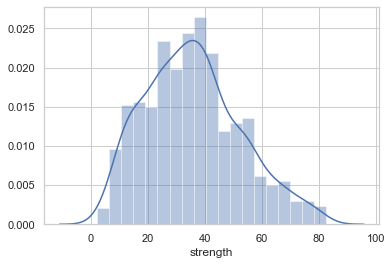

In [59]:
sns.distplot(data['strength'])
plt.show()

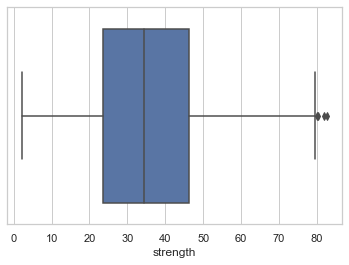

In [60]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["strength"])

In [61]:
# strength values lies between 2.33 to 82.6 with a median of 34.445 days. 
# Q3 = 46.135, Q1 = 23.710 ; IQR = 22.425
# lower outliers = Q1 - (1.5 x IQR) =  -9.9275
# higher outlier = Q3 + (1.5) x IQR) = 79.7725
# Values below -9.9275 and above 79.7725 are outliers. 

In [62]:
strength_outliers_df = data[(data.strength > 79.7725)]

In [63]:
strength_outliers_df.shape

(4, 9)

In [64]:
# There are only 4 rows with outlier values on the 'strength' column
# We will not transform the 'target' column. 

In [65]:
# Our transformation strategies so far are noted below.
# We will test the accuracy of the models with and without the outlier suppression.Depending upon the results, we may decide to retain the outliers.
# cement - no change required
# slag - drop the column 
# ash - drop the column
# water - replace lower outliers with Q1 and higher outliers with Q3 values
# superplastic - replace higher outlier values with Q3 values
# coarseagg - no change required
# fineagg - replace higher outlier values with Q3
# age - replace higher outlier values with Q3
# strength - no transformation required

# let's perform multi-variate analysis on input data to understand relationships between attributes

In [66]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [67]:
# The strength is positively correlated to cement, slag, superplastic and age. These factors increase the strength
# The strength is negatively correlated to ash, water, coarseagg and fineagg. These additives reduce the strength of the composite.

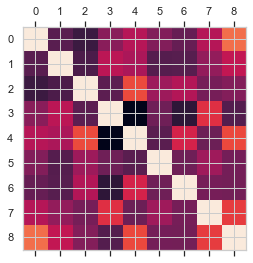

In [68]:
plt.matshow(data.corr())
plt.show()

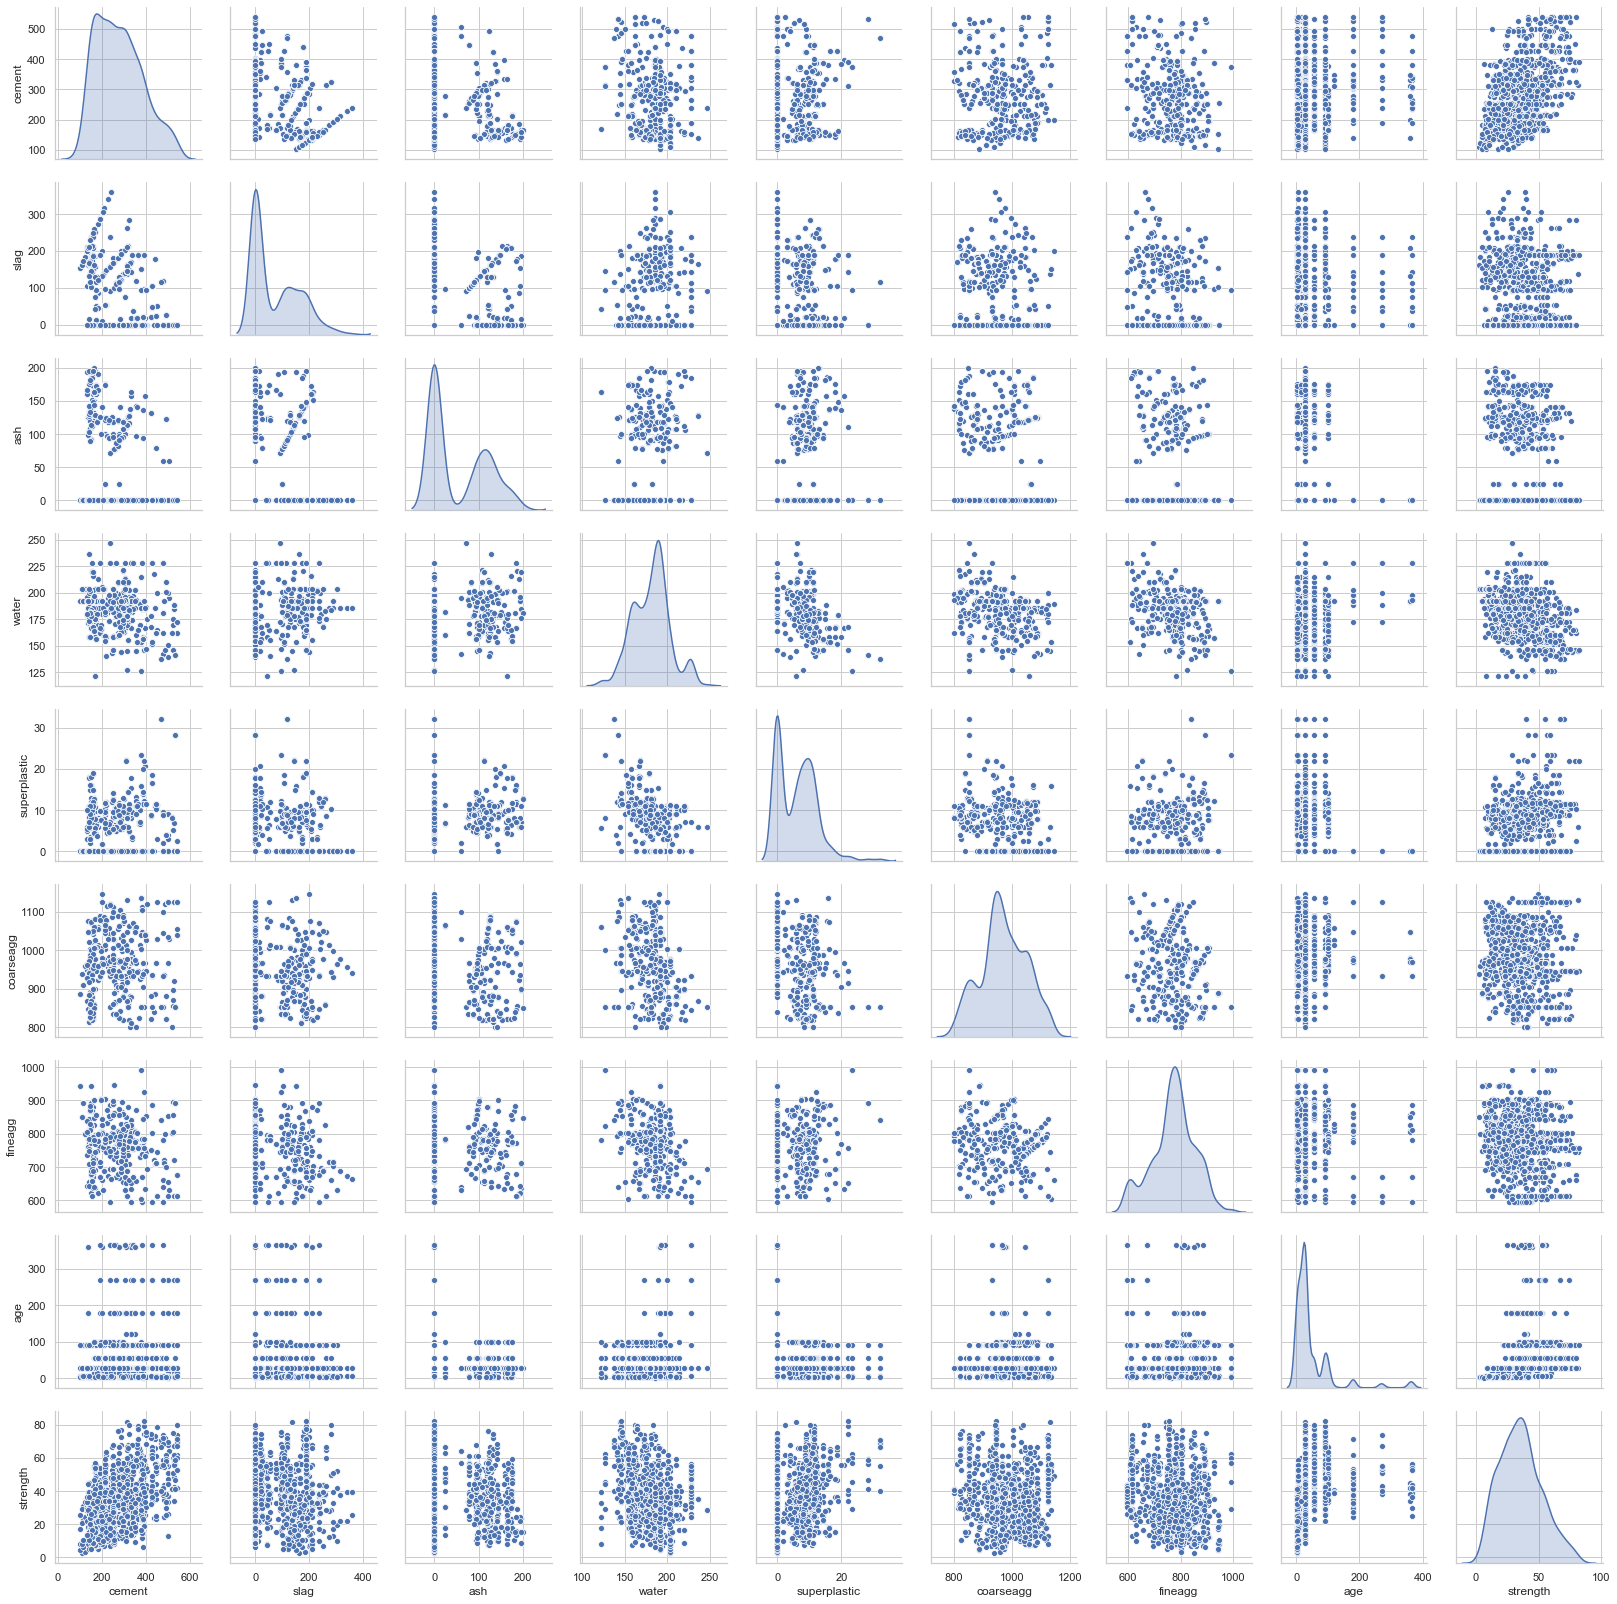

In [69]:
sns.pairplot(data, diag_kind="kde")

In [70]:
# The pairplot indicates that there may be multiple gaussian overlaps due to the peaks on the kde distribution. 
# However, some of the peaks on the input data are due to zero values. 
# Let's still go ahead and perform a cluster analysis to understand the data.

# let's perform KMeans Cluster analysis to understand any overlapping gaussians

In [71]:
# Create a copy of the original data frame 'data'

In [72]:
data_cluster = pd.DataFrame()
data_cluster = data.copy()

In [73]:
data_cluster.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [74]:
cluster_range = range(2,11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=5)
    a = clusters.fit(data_cluster)
    print(a)
    labels=clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, in

In [75]:
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,3.147325e+07
1,3,2.499599e+07
2,4,2.198953e+07
3,5,1.989323e+07
4,6,1.776827e+07
5,7,1.584669e+07
6,8,1.476661e+07
7,9,1.346338e+07
8,10,1.248398e+07


In [75]:
pred = clusters.predict(data_cluster)
frame = pd.DataFrame(data_cluster)
frame['cluster'] = pred
frame['cluster'].value_counts()

8    175
1    144
3    123
5    114
2    113
7    104
9     99
0     72
6     49
4     37
Name: cluster, dtype: int64

In [76]:
# Create an Elbow Plot

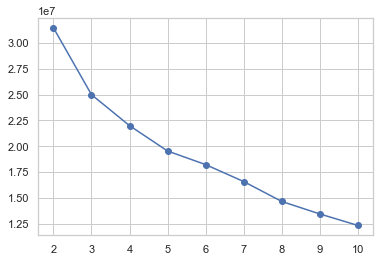

In [77]:
plt.figure(figsize=(6,4))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker="o")

In [78]:
# Elbow plot indicates that there might be 3 clusters in the input data. There is not a strong elbow though.

In [78]:
k = KMeans(n_clusters = 3)
a = k.fit_transform(data_cluster)
print(a)

[[319.20756344 254.98236452 102.09415223]
 [286.64683638  99.85433104 228.33935228]
 [199.80158996  82.65693769 221.00219904]
 ...
 [188.31625555 194.07056045 125.29399379]
 [243.69891525 331.44180242 309.25946337]
 [269.98656097 404.86278736 430.49043513]]


In [79]:
a.shape

(1030, 3)

In [79]:
cluster = KMeans(n_clusters = 3, random_state = 2354)
cluster.fit(data_cluster)

prediction = cluster.predict(data_cluster)
data_cluster['GROUP']=prediction

In [80]:
data_cluster.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster,GROUP
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,8,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,3,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2,1


In [81]:
data_cluster['GROUP'].value_counts()

1    350
0    345
2    335
Name: GROUP, dtype: int64

In [82]:
centroids = cluster.cluster_centers_
centroids

array([[ 224.79884058,   11.42318841,  101.92492754,  173.62231884,
           7.02      , 1016.41275362,  814.60173913,   39.06376812,
          29.5726087 ,    5.28985507],
       [ 223.59114286,  176.59542857,   34.078     ,  188.33628571,
           5.35057143,  943.35285714,  748.06171429,   39.68285714,
          35.55585714,    4.08857143],
       [ 399.37432836,   30.93522388,   26.03761194,  182.67731343,
           6.25731343,  959.01671642,  757.9961194 ,   58.70447761,
          42.52358209,    4.51940299]])

In [83]:
data_cluster.drop('cluster', axis=1, inplace=True)
centroids_df = pd.DataFrame(centroids, columns=list(data_cluster))
centroids_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,224.798841,11.423188,101.924928,173.622319,7.020000,1016.412754,814.601739,39.063768,29.572609,5.289855
1,223.591143,176.595429,34.078000,188.336286,5.350571,943.352857,748.061714,39.682857,35.555857,4.088571
2,399.374328,30.935224,26.037612,182.677313,6.257313,959.016716,757.996119,58.704478,42.523582,4.519403


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F4F612148>,
      dtype=object)

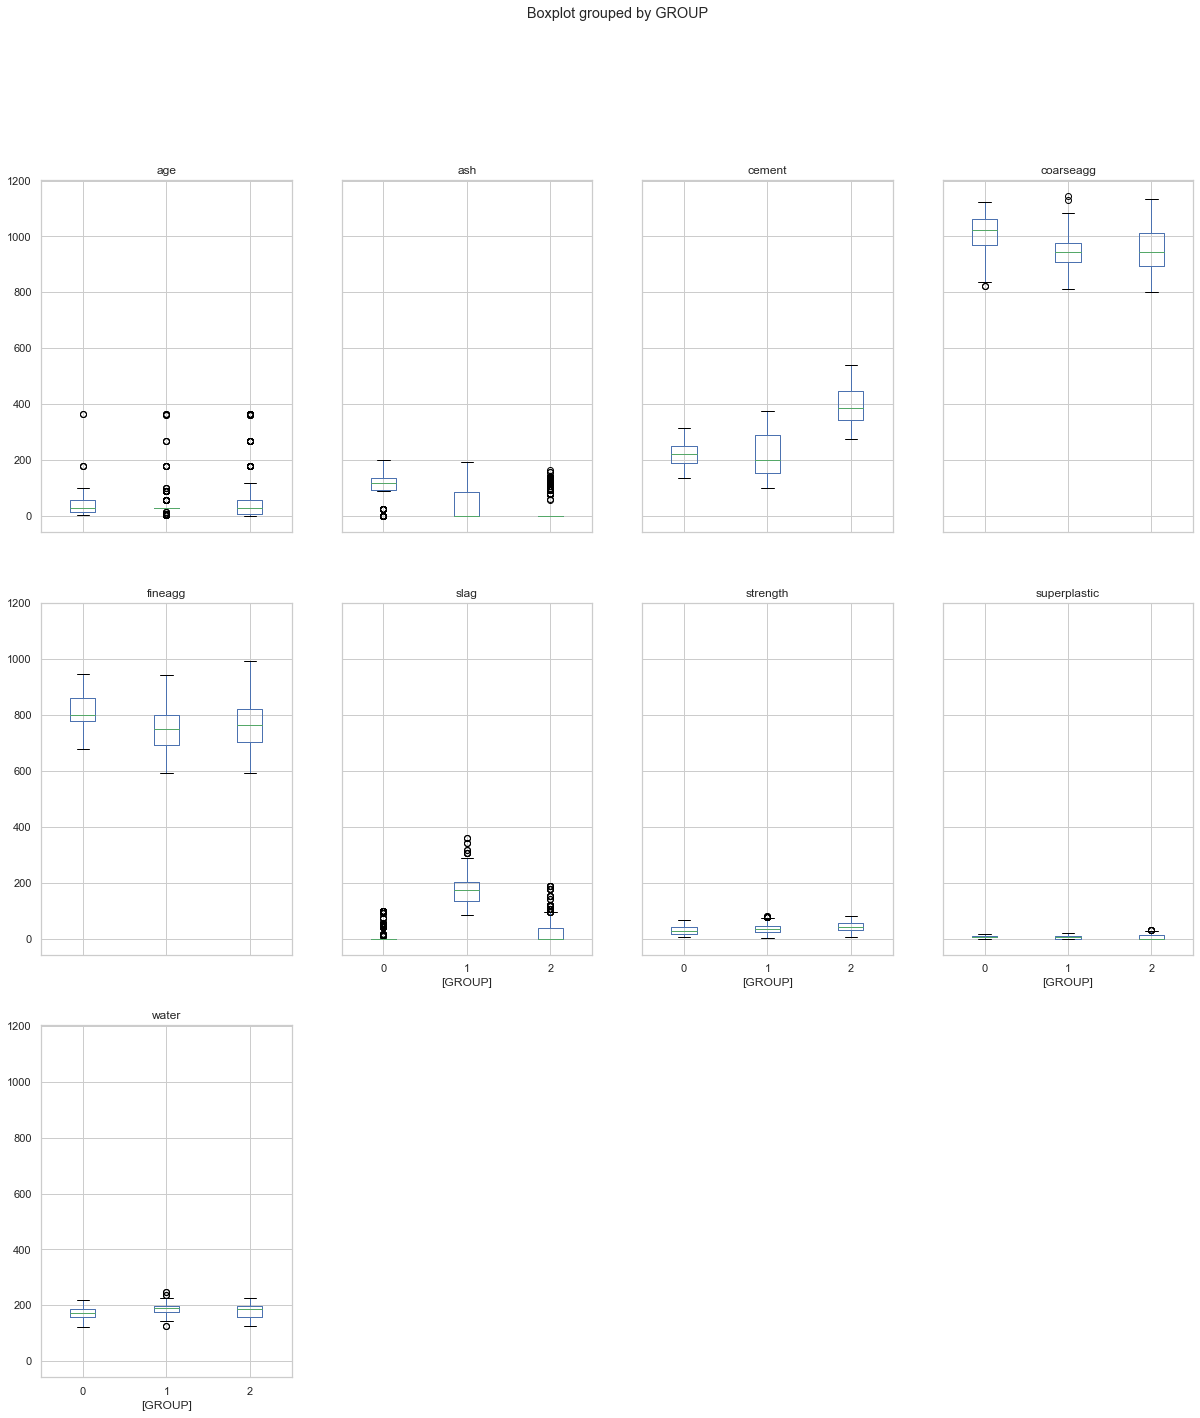

In [84]:
data_cluster.boxplot(by="GROUP", layout=(4,4), figsize=(20,30))

In [85]:
# The clusters show outliers. Columns 'age', 'ash', 'coarseagg', 'slag', 'superplastic' and 'water' have outliers

In [86]:
# Based on the nature of features, it may be better to develop a polynomial model than a linear model 

# let's convert the input data as %'s of total mixture composition

In [87]:
# Before we transform the data, let us convert the input data into % of total composition of the mixture. 

In [88]:
data_pct = pd.DataFrame()
data_pct = data.copy()

In [89]:
data_pct['total'] = data_pct['cement']+data_pct['slag']+data_pct['ash']+data_pct['water']+data_pct['superplastic']+data_pct['coarseagg']+data_pct['fineagg']
data_pct['cement%'] = (data_pct['cement']/data_pct['total'])*100
data_pct['slag%'] = (data_pct['slag']/data_pct['total'])*100
data_pct['ash%'] = (data_pct['ash']/data_pct['total'])*100
data_pct['water%'] = (data_pct['water']/data_pct['total'])*100
data_pct['superplastic%'] = (data_pct['superplastic']/data_pct['total'])*100
data_pct['coarseag%'] = (data_pct['coarseagg']/data_pct['total'])*100
data_pct['fineagg%'] = (data_pct['fineagg']/data_pct['total'])*100

In [90]:
data_pct.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total,cement%,slag%,ash%,water%,superplastic%,coarseag%,fineagg%
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2277.1,6.205261,9.310087,0.000000,8.936806,0.000000,42.677089,32.870757
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2381.5,7.092169,1.771992,5.219400,6.647071,0.453496,45.383162,33.432710
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2356.7,10.608054,0.000000,4.060763,7.951797,0.233377,40.603386,36.542623
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2210.0,12.036199,5.158371,0.000000,10.316742,0.000000,42.171946,30.316742
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2284.7,6.775507,8.027312,0.000000,8.460629,0.398302,45.844093,30.494157


In [91]:
# Remove the original columns. Retain the % based columns.

In [92]:
data_pct.drop('cement', axis=1,inplace=True)
data_pct.drop('slag', axis=1, inplace=True)
data_pct.drop('ash', axis=1, inplace=True)
data_pct.drop('water', axis=1, inplace=True)
data_pct.drop('superplastic', axis=1, inplace=True)
data_pct.drop('coarseagg', axis=1, inplace=True)
data_pct.drop('fineagg', axis=1, inplace=True)
data_pct.drop('total', axis=1, inplace=True)

In [93]:
data_pct.head()

,age,strength,cement%,slag%,ash%,water%,superplastic%,coarseag%,fineagg%
0,28,29.89,6.205261,9.310087,0.000000,8.936806,0.000000,42.677089,32.870757
1,14,23.51,7.092169,1.771992,5.219400,6.647071,0.453496,45.383162,33.432710
2,28,29.22,10.608054,0.000000,4.060763,7.951797,0.233377,40.603386,36.542623
3,28,45.85,12.036199,5.158371,0.000000,10.316742,0.000000,42.171946,30.316742
4,28,18.29,6.775507,8.027312,0.000000,8.460629,0.398302,45.844093,30.494157


In [94]:
# let us split the input data into training and test data. We will only transform the training data for outliers

In [95]:
X_data = data_pct.loc[:, data_pct.columns != 'strength']
y_data = data_pct.loc[:, data_pct.columns == 'strength']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.30, random_state=1)

# let's transform the training data for outliers. We will not modify the test data

In [97]:
# Our transformation strategies so far are:
# We will test the model scores with and without the outlier suppression. Depending upon the results, we may decide to retain outliers.
# cement - no change required
# slag - drop the column 
# ash - drop the column
# water - replace lower outliers with Q1 and higher outliers with Q3 values
# superplastic - replace higher outlier values with Q3 values
# coarseagg - no change required
# fineagg - replace higher outlier values with Q3
# age - replace higher outlier values with Q3
# strength - no transformation required

In [98]:
data_transformed = pd.concat([X_train, y_train], axis=1)

In [99]:
data_transformed.columns

Index(['age', 'cement%', 'slag%', 'ash%', 'water%', 'superplastic%',
       'coarseag%', 'fineagg%', 'strength'],
      dtype='object')

In [100]:
# remove columns slag% and ash% as they have significant zero values in the feature. 

In [101]:
data_transformed.drop('slag%',axis=1, inplace=True)
data_transformed.drop('ash%',axis=1, inplace=True)

In [102]:
data_transformed.head()

,age,cement%,water%,superplastic%,coarseag%,fineagg%,strength
185,14,15.204170,8.818419,0.000000,42.311034,33.666377,22.53
286,91,15.415052,7.010964,0.416289,38.170802,31.188690,64.90
600,3,12.085515,8.333333,0.000000,42.233857,37.347295,11.36
691,7,17.048004,10.228802,0.000000,41.812472,26.648721,32.82
474,28,15.607190,8.461201,0.482245,35.116177,34.107847,40.87


In [103]:
data_transformed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,721.0,45.968100,64.118513,1.000000,7.000000,28.000000,56.000000,365.000000
cement%,721.0,11.911190,4.347075,4.481547,8.158017,11.524650,14.917003,22.539641
water%,721.0,7.755112,1.085108,5.139030,6.952983,7.829166,8.367574,11.222172
superplastic%,721.0,0.264463,0.245612,0.000000,0.000000,0.281951,0.435074,1.314930
coarseag%,721.0,41.566080,3.050381,34.588999,39.856311,42.061786,43.785508,47.984563
fineagg%,721.0,32.917151,3.309535,24.797115,31.120810,32.972927,35.325248,41.398534
strength,721.0,35.756186,16.551049,2.330000,23.840000,34.200000,44.420000,81.750000


In [104]:
# define a function to treat outliers. This will replace lower outliers with Q1 and upper outliers with Q3

In [105]:
def treat_outliers(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range,Q1, Q3  

In [106]:
water_lower, water_upper, water_q1, water_q3 = treat_outliers(data_transformed['water%'])

In [107]:
# Ran the models with and without outlier suppression
# The model has better predicatability without outlier suppression.
# Therefore commenting the code below to replace outliers. 

In [108]:
# data_transformed.loc[(data_transformed['water%'] < water_lower), 'water%'] = water_q1
# data_transformed.loc[(data_transformed['water%'] > water_upper), 'water%'] = water_q3

In [109]:
sp_lower, sp_upper, sp_q1, sp_q3 = treat_outliers(data_transformed['superplastic%'])

In [110]:
# Ran the models with and without outlier suppression
# The model has better predicatability without outlier suppression.
# Therefore commenting the code below to replace outliers. 

In [111]:
# data_transformed.loc[(data_transformed['superplastic%'] < sp_lower), 'superplastic%'] = sp_q1
# data_transformed.loc[(data_transformed['superplastic%'] > sp_upper), 'superplastic%'] = sp_q3

In [112]:
fineagg_lower, fineagg_upper, fineagg_q1, fineagg_q3 = treat_outliers(data_transformed['fineagg%'])

In [113]:
# Ran the models with and without outlier suppression
# The model has better predicatability without outlier suppression.
# Therefore commenting the code below to replace outliers. 

In [114]:
# data_transformed.loc[(data_transformed['fineagg%'] < fineagg_lower), 'fineagg%'] = fineagg_q1
# data_transformed.loc[(data_transformed['fineagg%'] > fineagg_upper), 'fineagg%'] = fineagg_q3

In [115]:
age_lower, age_upper, age_q1, age_q3 = treat_outliers(data_transformed['age'])

In [116]:
# Ran the models with and without outlier suppression
# The model has better predicatability without outlier suppression.
# Therefore commenting the code below to replace outliers. 

In [117]:
# data_transformed.loc[(data_transformed['age'] < age_lower), 'age'] = age_q1
# data_transformed.loc[(data_transformed['age'] > age_upper), 'age'] = age_q3

In [118]:
data_transformed.head()

,age,cement%,water%,superplastic%,coarseag%,fineagg%,strength
185,14,15.204170,8.818419,0.000000,42.311034,33.666377,22.53
286,91,15.415052,7.010964,0.416289,38.170802,31.188690,64.90
600,3,12.085515,8.333333,0.000000,42.233857,37.347295,11.36
691,7,17.048004,10.228802,0.000000,41.812472,26.648721,32.82
474,28,15.607190,8.461201,0.482245,35.116177,34.107847,40.87


In [119]:
data_transformed.shape

(721, 7)

In [120]:
X_train = data_transformed.loc[:, data_transformed.columns != 'strength']
y_train = data_transformed.loc[:, data_transformed.columns == 'strength']

# Let's develop models and evaluate them

# try a simple linear regression model

In [121]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coeffficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coeffficient for age is 0.11120517227161172
The coeffficient for cement% is 0.7046112759691032
The coeffficient for water% is -6.996873298024084
The coeffficient for superplastic% is 2.912023513786229
The coeffficient for coarseag% is -2.0323602277734367
The coeffficient for fineagg% is -1.7387737907025982


In [122]:
X_test.drop('slag%', axis=1, inplace=True)

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
X_test.drop('ash%', axis=1, inplace=True)

In [124]:
y_pred = regression_model.predict(X_test)

In [125]:
y_pred_tp = y_pred.transpose()

In [126]:
y_pred_df = pd.DataFrame({'strength': y_pred_tp[0]})

In [127]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_df)) 

Mean Absolute Error: 8.111009755558785


In [128]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_df)) 

Mean Squared Error: 105.24585974699231


In [129]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_df)))

Root Mean Squared Error: 10.258940478772274


In [130]:
# The root mean square is error is 10.25 which is more than 10% of the mean value of the strength. 
# The model is therefore not very accurate. 

In [131]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.5936677568613331
0.6383795381403148


# Create a regularized RIDGE model and evaluate coefficients

In [132]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.11119192  0.70448599 -6.99780039  2.88488381 -2.03319347 -1.73883199]]


In [133]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5936676502346481
0.6383895258393354


In [134]:
# The ridge did not make a significant impact to the scores of linear regression

# Create a regularized Lasso model and evaluate coefficients

In [135]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.11030703  0.6828978  -7.20121973  0.         -2.11161929 -1.7424777 ]


In [136]:
# Some of the coefficients have become zero indicating that we can drop these dimensions from the model 

In [137]:
# Let us compare scores of these models

In [138]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5926166752434453
0.6384952447387043


In [139]:
# The results are more or less similiar as ridge or simple linear regression model. 
# The linear regression model does not appear to be quite fitting for this data. 

# Let us try polynomial model reflecting the non-linear interaction between dimensions

In [140]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [141]:
X_poly = poly.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.3, random_state=1)

In [142]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 6.85113404e-09  2.19717379e-03  3.10077096e+02  3.03861115e+02
  3.10433604e+02  3.68153072e+02 -1.89413601e+03  3.02550837e+02
  2.99060285e+02  8.63979832e-03  1.67090816e-02  3.69163322e-02
 -2.23149547e-02  1.75477598e-01 -1.91231520e-03  6.20182993e-03
  3.96928411e-02  1.66173637e-02 -1.14622819e+00  2.07473047e+01
  6.65423586e-02  7.77636182e-02  4.09902039e-02 -8.10950814e-01
  2.23724393e+01  4.33471361e-02  1.63615310e-01 -1.14337540e+00
  1.82712592e+01 -3.78346862e-02  1.35034534e-01  2.07982399e+01
 -7.08209879e-01 -5.46349475e-01  2.30782358e+01  2.21841904e+01
  1.77027180e-01]


In [143]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  2.27362776e-03 -8.59744007e-01 -7.11912283e+00
   5.02761450e+00  2.18612208e+01 -9.49828170e-01 -7.88493756e+00
  -1.00752027e+01  8.26634934e-03  1.65365932e-02  3.65540896e-02
  -1.93398963e-02  1.81553971e-01 -2.14076405e-03  5.93239829e-03
   8.47701469e-02  2.72398757e-02 -7.20376659e-01 -2.75292179e+00
   8.33252612e-02  9.25634202e-02  6.24078429e-02 -3.96997434e-01
  -1.22625402e+00  4.39142424e-02  1.91657201e-01 -8.63875358e-01
  -6.29563933e+00 -8.77426481e-02  1.07692208e-01  2.25392348e+00
  -2.28401606e-01 -1.95036286e-01  1.41536107e+00 -5.66724166e-01
   1.69452082e-01]]


In [144]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7454368892807043
0.7383286909070472


In [145]:
# the polynomial model has improved the accuracy of the regression model.

In [146]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  6.59003466e-03  1.59178095e-02  3.48074728e-02
 -1.80900913e-02  1.95052160e-01 -8.47192476e-04  4.70343400e-03
  6.61092467e-02  8.16888924e-02 -3.34679847e-02 -1.16690804e+00
  1.73541764e-01  1.11785018e-01  5.64040160e-02  5.37486890e-02
  0.00000000e+00  7.17867363e-02  1.63344154e-01  2.16889683e-02
 -2.81703955e+00  7.49085559e-02  1.42755199e-01  0.00000000e+00
  7.93866868e-02  5.17041161e-02  1.21568863e+00 -5.54567693e-01
  1.38044266e-01]


C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25824.198941237213, tolerance: 19.723479181109575
  positive)


In [147]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7354544728070089
0.7394729734297184


In [148]:
# With the reduced dimensions using Lasso, the score has reduced slightly.
# However, the predictability with the training and test data is consistent.

# Fit to a Decision Tree Regressor

In [149]:
X_data = data_pct.loc[:, data_pct.columns != 'strength']
y_data = data_pct.loc[:, data_pct.columns == 'strength']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.30, random_state=1)

In [151]:
dTree = DecisionTreeRegressor(random_state=0,max_depth=3)
dTree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [152]:
# Importance of features in tree building 
print(pd.DataFrame(dTree.feature_importances_, columns=["Imp"], index=X_train.columns))

                    Imp
age            0.440625
cement%        0.347791
slag%          0.000000
ash%           0.000000
water%         0.211584
superplastic%  0.000000
coarseag%      0.000000
fineagg%       0.000000


In [153]:
# This assessment indicates that the features that are of most importance are cement%, water% and age

In [154]:
y_pred = dTree.predict(X_test)

In [155]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.6438854770505935
0.5717890361624741


In [156]:
# Based on this assessment, the scores are as below:
# Simple Linear Regression : Training  : 0.59 ; Testing  : 0.63
# Linear Regression - Ridge regularization - Training : 0.59 ; Testing : 0.63
# Linear Regression - Lasso regularization - Training : 0.59 ; Testing : 0.63
# Polynomial Regression - Ridge regularization - Training : 0.74 ; Testing : 0.73
# Polynomial Regression - Lasso regularization - Training : 0.73 ; Testing : 0.73
# Decision Tree regression - Training  : 0.64 ; Testing  : 0.57

In [157]:
# It is better to select a polynomial regression with a Lasso regularization as the results are consistent with
# the training and testing sets of data. This model selection also offers the highest score. 

# Tune and optimize the model

In [158]:
# let's find out the most optimal polynomial for this data. Attempt to tune the hyperparameter number of degrees. 

In [159]:
# let's try a polynomial with degrees = 3

In [160]:
X_data = data_pct.loc[:, data_pct.columns != 'strength']
y_data = data_pct.loc[:, data_pct.columns == 'strength']

In [161]:
poly_3 = PolynomialFeatures(degree = 3, interaction_only=True)

In [162]:
X_poly = poly_3.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.3, random_state=1)

In [163]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 1.11229292e-07  3.65817665e-01 -1.46081159e+02 -8.97197774e+01
  1.30678578e+02  2.09842415e+02  2.43099527e+02 -1.77431488e+02
 -1.70388095e+02  2.24237399e-01  6.65930111e-01  1.23109836e-01
 -8.33706333e-01  3.64537650e+01 -6.19574854e-02  1.03877709e-02
 -1.79811908e+00 -3.56193212e+00 -7.57497203e+00 -2.91490223e+01
 -1.27628516e+00 -1.89261970e+00 -9.34664673e+00 -1.05377091e+01
  2.15678049e+01 -1.27499665e+00 -4.75526252e+00 -2.81869282e+01
  3.71813010e+00 -5.92199346e+00 -5.88673329e+00 -5.91206958e+02
 -6.50304117e+00 -6.42746057e+00 -8.59512960e+00 -1.54753008e+01
 -9.47395931e-01 -1.71157541e-03  4.84688260e-03 -6.58687774e-03
 -4.35275282e-01 -2.70209287e-03  1.13118444e-04  6.04815121e-03
 -1.48052176e-02 -4.67135005e-01 -9.19559903e-03 -2.09244206e-03
 -1.17792643e-02 -4.40906496e-01 -3.38318604e-03  4.55506182e-03
 -3.88217213e-01  1.93172391e-02  5.52234431e-03 -2.99405423e-01
 -4.03589138e-01 -2.39327853e-04  3.10519744e-02  1.19463713e-01
  6.59024622e-02  6.55076

In [164]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00 -8.76955984e-03 -1.55686493e+01  3.10831770e+00
   9.92419546e+00  5.03925506e+00 -6.36951546e-01 -2.14470964e+00
   2.78542258e-01  1.46994444e-01  5.90877834e-01  2.74070175e-01
  -1.78390055e-03 -1.87381460e+00 -1.33023295e-02  8.61436707e-07
  -1.85353194e+00 -7.15614253e-01  3.18236505e+00 -1.94608914e+01
   4.34847621e-01  1.42061207e-01 -3.83053514e+00 -1.44422006e-01
   5.60017831e+00  1.11324669e+00 -1.16742752e+00 -6.68153397e+00
   7.47171839e+00  3.32493251e-01  1.25021709e+00 -6.78876508e+00
   3.58464193e-01  2.69673344e-01 -2.44498112e+00 -1.14893648e+01
   7.75723389e-02 -2.09070702e-03  1.43090526e-03 -1.17272761e-02
  -2.01993652e-02 -1.91532808e-03  6.48259312e-04  2.52478833e-03
  -1.90398624e-02 -5.74346016e-02 -8.48675421e-03 -1.65693709e-03
  -1.23600963e-02 -1.36683195e-02 -5.96492265e-03  2.35968406e-03
  -3.36943537e-02  5.10658326e-03 -8.12761583e-04  7.00671523e-02
  -6.22235704e-03 -5.23260207e-04  9.37711460e-03  1.28262981e-

In [165]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8026949562907882
0.747790130015473


In [166]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  9.41976101e-02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -8.92783928e-04  1.16508633e-02  6.67887587e-04
  1.79593141e-02 -0.00000000e+00 -3.44884117e-03  1.07316530e-03
 -1.87911792e-01 -0.00000000e+00  2.16271457e-01 -0.00000000e+00
  7.67392492e-02 -4.60198986e-03 -0.00000000e+00 -2.20168891e-02
  0.00000000e+00  0.00000000e+00  3.32707883e-03  0.00000000e+00
 -0.00000000e+00  3.28893725e-02  1.53889817e-03 -0.00000000e+00
  2.07831413e-02 -1.68330688e-02  0.00000000e+00 -0.00000000e+00
  3.16366321e-02 -1.64357371e-03  3.84237709e-03 -2.04564401e-03
 -2.06396101e-02  2.89469023e-04  4.90527374e-04  1.00351107e-03
 -6.52732434e-04  4.48054804e-02 -1.26298246e-05  7.62053143e-04
 -6.10397784e-03  1.96215744e-02 -1.66655866e-04  1.31731005e-03
  1.13434090e-01 -1.63455684e-04  5.60055270e-04  2.02132875e-03
 -1.21460662e-02 -2.19815427e-04 -1.38228343e-02  2.94109951e-02
 -0.00000000

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22921.764313490632, tolerance: 19.723479181109575
  positive)


In [167]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7708371198953415
0.7544268404155344


In [168]:
# let's try a polynomial with degrees = 4

In [169]:
X_data = data_pct.loc[:, data_pct.columns != 'strength']
y_data = data_pct.loc[:, data_pct.columns == 'strength']

In [170]:
poly_4 = PolynomialFeatures(degree = 4, interaction_only=True)

In [171]:
X_poly = poly_4.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.3, random_state=1)

In [172]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-4.08878163e-04 -2.20118386e+00 -1.43065970e+03 -1.62098185e+03
  1.37292710e+03 -5.16198998e+02  5.25040735e+03 -1.53652372e+03
 -1.51897020e+03  2.86462788e-01  3.05154136e+00 -1.70690751e+01
 -1.18887117e+01 -1.91588999e+02 -1.15422691e+00 -1.75419642e+00
 -3.34142548e+01 -9.82343900e+01 -2.48730461e+01  1.67259262e+02
 -4.46379460e+00 -3.88538541e+00 -1.11799333e+02  5.53982986e+00
  6.27609617e+02 -9.52548347e-01  3.88249553e+00 -2.79671724e+02
 -7.13507461e+02 -5.79807633e+01 -6.45326126e+01 -1.70119542e+03
 -2.12213720e+01 -2.09420282e+01 -7.48278712e+01 -6.26841214e+01
 -3.40952862e+00 -1.70725522e-01  4.59998268e-01  1.42282437e-01
  4.20052866e-02  1.54191955e-02  1.66587010e-02 -1.11820203e+00
  2.11648353e-01  5.81025070e+00 -2.87835773e-02 -7.55854438e-02
  1.09929087e+00  1.44494159e+01  2.69232087e-01  3.15975402e-01
  2.37693338e+01  3.18848711e-01  3.60883854e-01  2.62426787e+00
  1.95651470e+00  6.13802672e-02  1.12199845e+00  2.71460057e+00
 -2.31733503e-01  7.98740

In [173]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  2.52321991e-02 -1.68488468e+00  5.98195540e-01
   6.23683730e-01  1.90675149e+00  5.20857927e-03 -1.36052239e+00
  -8.84322677e-02  6.74334464e-01  1.14945962e+00  1.21668221e+00
   8.78320699e-01 -1.28888088e+00  4.33810864e-01 -5.40516091e-01
  -5.64141399e+00 -9.32024866e+00  1.04264849e+01 -3.72161285e-01
   2.30212779e+00  2.10160593e+00 -3.84433089e+00  6.56359900e+00
   7.80793574e-01  1.05117345e+00  3.84107715e+00 -5.80116856e-01
  -2.51968099e-02  4.98139657e+00  9.63726265e+00 -1.05425026e+00
   5.31411807e+00  6.41406832e+00  1.89548978e+00 -1.77790995e-01
   1.75564654e+00 -1.09661353e-01 -2.56769383e-02 -8.14173350e-02
  -1.11531008e-01 -2.57939336e-02  2.25113434e-02 -1.00479575e+00
   1.91559213e-01  4.50632327e+00 -1.18708577e-02 -6.56660279e-02
   1.57704268e-01  8.22206465e+00 -6.32094507e-02 -1.04509208e-02
  -1.17935214e+01 -1.87783771e-02  7.27307074e-02 -4.92648024e-01
  -1.40618985e-01  4.00680175e-03 -2.55878857e-02  4.56065654e-

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41984e-17): result may not be accurate.
  overwrite_a=True).T


In [174]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8503504203368372
0.7296220709161664


In [175]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -6.97213480e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.13375281e-03  4.42753165e-02  1.24239088e-02
  3.81595700e-03 -0.00000000e+00 -1.38572793e-03 -2.23454890e-03
 -1.74677174e-01 -0.00000000e+00  3.02334731e-01 -0.00000000e+00
  8.30562502e-02 -2.28602539e-03 -0.00000000e+00 -3.02443518e-03
 -0.00000000e+00  0.00000000e+00 -2.22356018e-02  0.00000000e+00
  0.00000000e+00  3.93526957e-02  1.25807482e-03 -0.00000000e+00
  0.00000000e+00  1.36441349e-02 -0.00000000e+00 -0.00000000e+00
  4.60706135e-02 -1.03764981e-03  2.44118157e-03 -1.88246615e-03
  2.70039372e-03  3.94859835e-04  9.01256880e-05 -2.14686387e-03
  3.52078719e-03  1.47105310e-01 -3.70957774e-04 -1.12124525e-04
  1.68212328e-03  0.00000000e+00 -4.04133415e-04  4.75689539e-04
 -1.82769016e-02  1.01785929e-04  2.51036418e-04 -8.63212385e-04
 -7.36690236e-03 -1.45690015e-04 -5.50024857e-02  2.29999108e-02
 -0.00000000

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21408.373315172583, tolerance: 19.723479181109575
  positive)


In [176]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7864560312207354
0.7652376699045411


In [177]:
# let's try a polynomial with degrees = 5

In [178]:
X_data = data_pct.loc[:, data_pct.columns != 'strength']
y_data = data_pct.loc[:, data_pct.columns == 'strength']

In [179]:
poly_5 = PolynomialFeatures(degree = 5, interaction_only=True)

In [180]:
X_poly = poly_5.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.3, random_state=1)

In [181]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 1.84716499e-04  2.00816582e+01 -1.14486423e+04 -6.42523178e+03
 -3.08091010e+03 -1.18163817e+04  5.50260417e+04 -1.11055400e+04
 -1.11493646e+04  5.69140187e+01 -1.03143089e+02 -2.23759580e+02
  1.50190868e+02  2.08165664e+03  1.87246630e+01  2.45564057e+01
 -1.07708482e+02 -3.86089885e+02  7.89143373e+01 -1.82212341e+03
  1.65162773e+01  2.05432161e+01 -3.78052748e+03 -4.99457933e+02
 -2.54022197e+04 -1.05517987e+02 -1.26744733e+02 -7.23743835e+02
 -1.67601867e+04 -1.98860975e+02 -1.77503431e+02 -1.59037283e+04
  3.00237232e+01  3.72793357e+01 -8.50738100e+02 -4.80438560e+02
  8.38924025e+00  1.30867728e+00  2.00189795e+01 -8.32946982e+00
 -1.82279657e+02 -1.66753024e+00 -1.99109790e+00  1.46169218e+02
  1.11031840e+01  5.66247796e+02  2.17881041e+00  2.86559824e+00
  2.10506567e+01  1.89880757e+02  5.96416917e+00  5.46280324e+00
  2.03040366e+01 -3.84851957e+00 -4.56027287e+00 -6.80187681e+01
 -1.01952174e+02 -9.12963394e-01  4.65778826e+01  8.85535768e+00
  7.28177390e+02  2.70186

In [182]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  9.90870196e-02 -2.27301928e+00  6.10464158e-01
   6.80791869e-01  2.14013632e+00  1.52825785e-02 -3.86134611e+00
   2.68769053e+00  5.59816467e+00 -6.89555237e+00  3.04093466e+00
   8.59591829e+00 -1.38729882e+00  1.47875026e+00 -5.22307960e-01
   7.17877561e-01  3.90605824e-01  1.17737645e+01  8.60585284e-01
   2.93038840e+00  2.58670201e+00  4.80407296e-02  6.76026232e+00
  -3.18038203e-01  6.50594655e-01 -1.40403777e+00  1.39867195e+00
   4.47518309e-01  6.04967771e+00  9.36393980e+00 -1.12576595e+00
   6.79903454e+00  7.29762272e+00  1.47767038e+00  4.53095888e-01
   2.16541837e+00 -1.26935315e+00  2.77277129e+00 -6.52766445e-01
  -5.80255942e+00 -1.52578572e-01 -6.37461219e-02  2.27862732e+00
   1.50247473e+00  1.34307623e+00  1.67257371e-01  6.70561000e-01
   6.24053194e-01  2.57253233e+00  3.55138982e-02  4.19063307e-01
  -1.81669068e+01 -2.13712455e-01  1.68281119e-02 -3.60385596e-01
   8.06618206e-01 -1.33271647e-02 -1.16803227e+01 -2.62402447e-

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.13903e-19): result may not be accurate.
  overwrite_a=True).T


In [183]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8668685812877481
0.6489190149494299


In [184]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -4.23103167e-03  5.71172781e-02  3.06212008e-02
  3.08197277e-03 -0.00000000e+00 -1.83651062e-03 -2.60287513e-03
 -2.48257556e-01  0.00000000e+00  3.30837973e-01 -0.00000000e+00
  8.33409993e-02 -6.37103005e-03 -0.00000000e+00 -2.88512730e-02
 -0.00000000e+00  3.34172790e-03 -5.91172282e-04  0.00000000e+00
  0.00000000e+00  4.44800770e-02  6.82153857e-03 -0.00000000e+00
  0.00000000e+00  1.87922465e-02 -0.00000000e+00 -0.00000000e+00
  4.84837216e-02  1.45863327e-03  2.54166414e-03 -2.01694205e-03
 -5.51265972e-03  3.62314180e-04  7.01115622e-05 -9.17275100e-03
  3.02100667e-03  1.19058495e-01 -4.04609296e-04 -4.08331046e-04
  2.58395366e-03  1.67263651e-02 -3.98488412e-04  3.72304947e-04
 -1.95050942e-02  1.94875253e-04  2.22000888e-04 -9.34341267e-04
 -9.96807156e-03 -1.50629083e-04 -4.32133482e-02  2.15826572e-02
 -0.00000000

C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20907.506666581507, tolerance: 19.723479181109575
  positive)


In [185]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7910628831390771
0.7628923709653128


In [186]:
# Given these scores,it may be best to keep a degree 3 polynomial. 
# With increasing degrees, the gain in score is not very significant.